![](https://i.imgur.com/JsMvGnP.png)

## 1. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 1.1 Análise exploratória

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/mharcoshungria/classification_churn_rate/main/churn_modelling.csv', sep=',')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df_VarUsadas = df[['CreditScore','Geography','Gender', 'Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]

In [10]:
df_VarUsadas.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df_VarUsadas.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

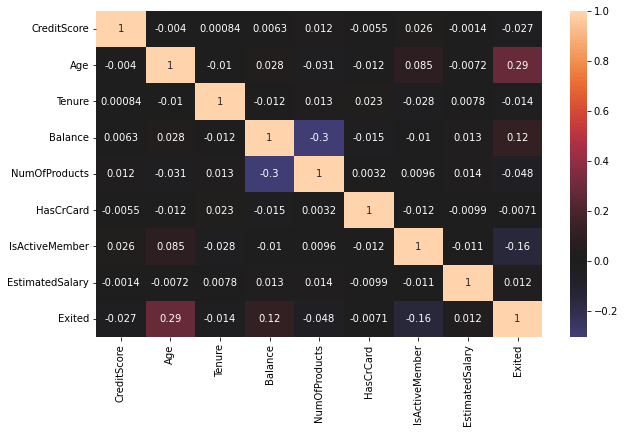

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df_VarUsadas.corr(), annot=True, center=0)

### 1.2 Seleção de atributos

In [13]:
# seu código
#X = df[['CreditScore','Geography','Gender', 'Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
X = df[['Age', 'Balance', 'EstimatedSalary']]
X

,Age,Balance,EstimatedSalary
0,42,0.00,101348.88
1,41,83807.86,112542.58
2,42,159660.80,113931.57
3,39,0.00,93826.63
4,43,125510.82,79084.10
...,...,...,...
9995,39,0.00,96270.64
9996,35,57369.61,101699.77
9997,36,0.00,42085.58
9998,42,75075.31,92888.52


In [14]:
y = df[['Exited']]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [15]:
X.shape, y.shape

((10000, 3), (10000, 1))

### 1.3 Construção do modelo

In [16]:
from sklearn.model_selection import train_test_split
SEED = 42
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state = SEED)

In [17]:
y_teste

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0
...,...
4862,0
7025,1
7647,0
7161,0


In [40]:
# Importando DummyClassifier

from sklearn.dummy import DummyClassifier
dc = DummyClassifier(strategy='stratified', random_state=SEED)

In [41]:
dc.fit(X_treino, y_treino)

DummyClassifier(random_state=42, strategy='stratified')

In [42]:
print (X_treino.shape, y_treino.shape, X_teste.shape, y_teste.shape)

(7500, 3) (7500, 1) (2500, 3) (2500, 1)


In [43]:
result = dc.predict(X_teste)
result

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [44]:
# Importando RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier()
rfc.fit (X_treino, y_treino)
result_rfc = rfc.predict(X_teste)
result_rfc

C:\Users\mharc\AppData\Local\Temp/ipykernel_7536/676701075.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit (X_treino, y_treino)


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
#Importando Support Vector Machines - SVM

from sklearn.svm import SVC

In [47]:
svc = SVC()
svc.fit(X_treino, y_treino)
result_svc = svc.predict(X_teste)
result_svc

C:\Users\mharc\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 1.4 Avaliação do modelo

In [52]:
# DummyClassifier

dc.score(X_teste, y_teste)

0.6748

In [53]:
# RandomForestClassifier

rfc.score(X_teste, y_teste)

0.7856

In [54]:
# SVM

svc.score(X_teste, y_teste)

0.8012

## 2. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.